## Code to Calculate Phase of Precipitation from Monthly data (climo or timseries or h0 files)
### - This versio assumes we are using ensemble avareg timeseries fom a different location (from Christine S.)

In [36]:
import xarray as xr
import datetime as dt
import pandas as pd
import numpy as np
import cftime
import dask as dk

import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import cartopy.feature as cf

import matplotlib.pyplot as mp
from matplotlib.colors import ListedColormap

from mpl_toolkits.axes_grid1 import AxesGrid

import glob


import importlib
import monsoon_mon_utils as mymons


from distributed import Client, LocalCluster
from ncar_jobqueue import NCARCluster


In [37]:
#cluster = NCARCluster()
#cluster.scale(10)
#client = Client(cluster)
#client

In [38]:
''' Routines to process input data and return variable or creat variable specifc climo file '''


projection = ccrs.PlateCarree()
cmap1 = ListedColormap(['mediumslateblue', 'blue','cornflowerblue','cyan','c','green','bisque','yellow','darkorange','orangered','pink','deeppink'])
#cmap2 = ListedColormap(['w','lavender','mediumpurple','rebeccapurple','indigo','darkblue','mediumblue','blue','darkgreen','green','yellowgreen','yellow','gold','orange','darkorange','orangered','red','firebrick','darkred','salmon','indianred','lightcoral','pink','hotpink'])
cmap2 = ListedColormap(['w','lavender','mediumpurple','rebeccapurple','indigo','darkblue','mediumblue','blue','darkgreen','green','yellowgreen','yellow','gold','orange','darkorange','orangered','red','firebrick','darkred','salmon'])

letts = ['(a)','(b)','(c)']







In [39]:
'''
    Run Specs.
'''

case_names = ['GPCP','CESM2','E3SMv2']
#case_names = ['GPCP','GPCP','GPCP']

var_name = 'PRECT' ; vscale = 86400.*1000.
cyears = ['2081','2100']
lsave = True
l_ens_ave = True

# For the phase diagrma
lone,lonw,lats,latn = 60.,120.,0.,30.
lat_lon = (60,120,0,30)

# For the time/lat monsonon plot.
lonm_w = 70 ; lonm_e = 100.
latm_s = 0.; latm_n = 40. 


In [40]:


'''
    Derived info.
'''

dir_obs = '/glade/p/cesm/amwg/amwg_data/obs_data/'

if l_ens_ave:
    dir_e3sm = '/glade/work/shields/E3SM2/eavg/cmip/EM1-20/'
    dir_cesm2 = '/glade/work/shields/CESM2-LE/eavg/cmip/'
else:
    dir_e3sm = '/glade/campaign/cgd/ccr/E3SMv2/FV_regridded/'
    dir_cesm2 = '/glade/campaign/cgd/cesm/CESM2-LE/atm/proc/tseries/month_1/'




##### Case dictionary #####

case_dic = {}

case_dic['GPCP']  = ['climo','GPCP',True,dir_obs,True]

case_dic['E3SMv2']  = ['tseries','v2.FV1.SSP370.EM1-20',False,dir_e3sm,False]
case_dic['CESM2'] = ['tseries','b.e21.BSSP370cmip6.f09_g17.LE2.EM1-20',False,dir_cesm2,False]

#case_dic['E3SMv2']  = ['tseries','v2.FV1.historical_0101',False,dir_e3sm,False]
#case_dic['CESM2'] = ['tseries','b.e21.BHISTcmip6.f09_g17.LE2-1001.001',False,dir_cesm2,False]


#case_dic['CESM2'] = ['tseries','b.e21.BHIST.f09_g17.CMIP6-historical.011',True,dir_cesm2,False]

# Name wrapper.
case_df = pd.DataFrame.from_dict(case_dic, orient='index',columns=['cclimo','rname','lcexist','cdir','lobs'])

##### Var dictionary #####

var_dic = {}
var_dic['PRECT']  = ['Total Pecipitation','mm/day','PRECT',86400*1000.,1.]
# Var wrapper.
var_df = pd.DataFrame.from_dict(var_dic, orient='index',columns=['vlname','vunits','voname','vscale','voscale'])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

-Processing data for GPCP
-Observations case
 -> First/last files = 
 /glade/p/cesm/amwg/amwg_data/obs_data/GPCP_01_climo.nc 
 /glade/p/cesm/amwg/amwg_data/obs_data/GPCP_12_climo.nc


/glade/scratch/rneale/ipykernel_63564/1202188370.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2[ic].set_xticklabels(mymons.msnames())



-Processing data for CESM2
-Model case
-Time series files
-> First/last files = 
 /glade/work/shields/CESM2-LE/eavg/cmip//b.e21.BSSP370cmip6.f09_g17.LE2.EM1-20.PRECT.208101-210012.nc 
 /glade/work/shields/CESM2-LE/eavg/cmip//b.e21.BSSP370cmip6.f09_g17.LE2.EM1-20.PRECT.208101-210012.nc


/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome


-Processing data for E3SMv2
-Model case
-Time series files
/glade/work/shields/E3SM2/eavg/cmip/EM1-20//v2.FV1.SSP370.EM1-20.eam.h0.PRECC.208101-210012.nc
-> First/last files = 
 /glade/work/shields/E3SM2/eavg/cmip/EM1-20//v2.FV1.SSP370.EM1-20.eam.h0.PRECC.208101-210012.nc 
 /glade/work/shields/E3SM2/eavg/cmip/EM1-20//v2.FV1.SSP370.EM1-20.eam.h0.PRECC.208101-210012.nc


/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

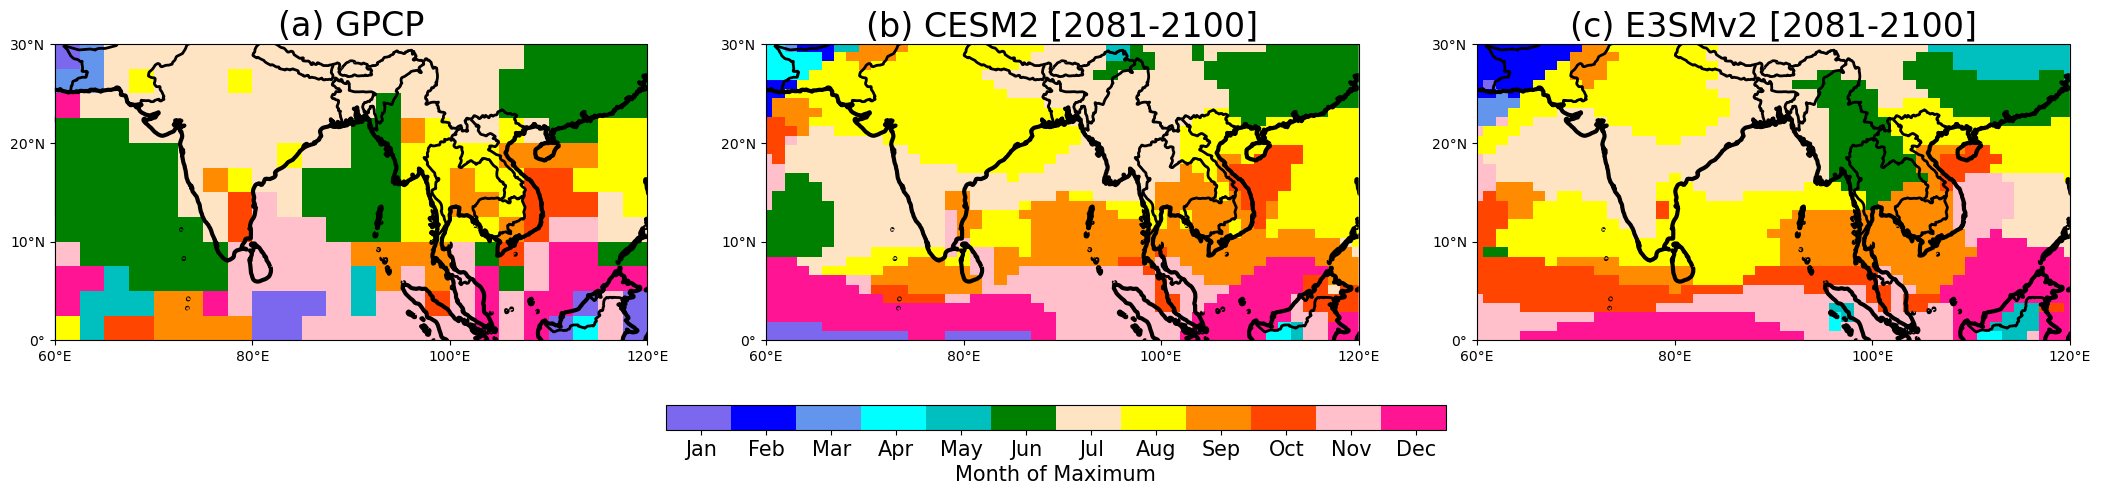

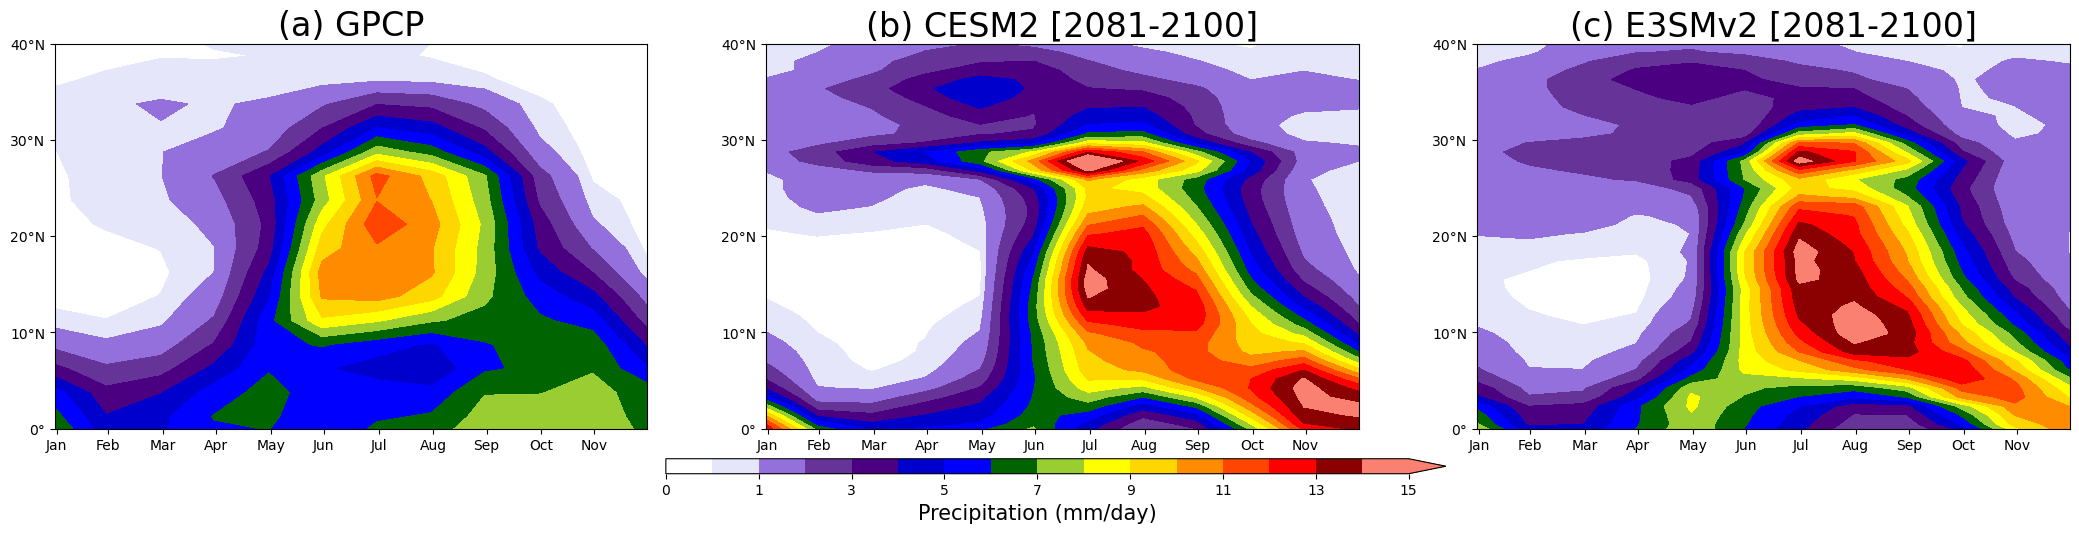

In [41]:
'''
    Main Code Logic with Plots
'''

%load_ext autoreload
%autoreload 2


#fig = mp.figure(figsize=(26, 8))
#ax = mp.subplot(1,1,2, projection=projection)

fig1, ax1 = mp.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': projection},
                        figsize=(26,5))
mp.figure(1)

fig2, ax2 = mp.subplots(nrows=1,ncols=3,figsize=(26,5))

mp.figure(2)


lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()




''' LOOP CASES '''

for ic,case_name in enumerate(case_names):
    
  


    print('')
    print('-Processing data for '+case_name)
    
    
# Monthly climos (nmonth,nlat,nlon)
    data_climo = mymons.get_mon_climos(case_name,case_df,var_name,var_df,cyears,l_ens_ave)
# Month phase of maximum and minimum
    phase_min,phase_max = mymons.calc_mon_phase(data_climo)
    
    

    '''''
        Plotting For Phase Max
    '''''

    lons = phase_max.lon
    lats = phase_max.lat
    
 


    # make the color map:
   
    mp.figure(1)

    pphase = ax1[ic].pcolormesh(lons, lats, phase_max,transform=projection,cmap=cmap1)
       
    ax1[ic].xaxis.set_major_formatter(lon_formatter)
    ax1[ic].yaxis.set_major_formatter(lat_formatter)
    
    ax1[ic].set_extent(lat_lon)
    ax1[ic].add_feature(cf.COASTLINE, lw=3)
    ax1[ic].add_feature(cf.BORDERS,lw=2)
    
    
    this_title= letts[ic]+' '+case_name+' ['+cyears[0]+'-'+cyears[1]+']' if case_name != 'GPCP' else letts[ic]+' '+case_name
    
    ax1[ic].set_title(this_title,fontsize=24)    
    
    ax1[ic].set_ylim(lat_lon[2],lat_lon[3])
    
    ax1[ic].set_xticks(np.arange(lat_lon[0], lat_lon[1]+20, 20), crs=projection)
    ax1[ic].set_yticks(np.arange(lat_lon[2], lat_lon[3]+10, 10), crs=projection)
        
    mp.figure(2)
   




    '''
        Month/lat plot
    '''
        
    mon_lat_time = data_climo.sel(lon=slice(lonm_w,lonm_e)).mean(dim='lon')
        
    mplevs = [0,0.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    pcont = ax2[ic].contourf(mon_lat_time.time, lats, mon_lat_time.transpose(),levels = mplevs,cmap=cmap2,extend='max') 
    
    
    ax2[ic].set_title(this_title,fontsize=24)    
#    ax2[ic].set_xticks(range(len(mon_lat_time.time)))
#    ax2[ic].get_xticks()

#    ax2[ic].set_xlim(mon_lat_time.time[0],mon_lat_time.time[-1]+0.001)

#    print(mon_lat_time.time.dt.strftime("%b"))
    
    ax2[ic].set_xticklabels(mymons.msnames())
    ax2[ic].set_yticks(np.arange(lat_lon[2], lat_lon[3]+20, 10))
    ax2[ic].yaxis.set_major_formatter(lat_formatter)
    ax2[ic].set_ylim(latm_s,latm_n)
    
    

    
    mp.rc('xtick', labelsize=10) 
    mp.rc('ytick', labelsize=10) 
    
        
# Draw the colorbar
# Add a colorbar axis at the bottom of the graph

'''
 Fig 1
'''

mp.figure(1)
        
cbar_ax1 = fig1.add_axes([0.36, 0.02, 0.3, 0.05])
colb1=mp.colorbar(pphase, cax=cbar_ax1,orientation='horizontal',ticks = 0.5+(11/12)*np.arange(np.min(phase_max),np.max(phase_max)+1))

colb1.ax.set_xticklabels(mymons.msnames(),fontsize=15)
colb1.set_label('Month of Maximum',fontsize=15)



mp.savefig('CESM2_E3SM_Monsoon_phase_future_ensav.png', dpi=200,bbox_inches='tight') 

'''
 Fig 2
'''

mp.figure(2)



        
cbar_ax2 = fig2.add_axes([0.36, 0.02, 0.3, 0.03])
colb2=fig2.colorbar(pcont, cax=cbar_ax2,orientation='horizontal')

colb2.set_label('Precipitation (mm/day)',fontsize=15)

mp.savefig('CESM2_E3SM_Monsoon_extent_future_ens_ave.png', dpi=200,bbox_inches='tight') 



        



    


    
    



In [34]:
'''
Plots of monthly variation of Monsoon extent
'''





'\nPlots of monthly variation of Monsoon extent\n'